In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import geopandas as gpd

In [114]:
# set the filepath and load in a shapefile
fp = "dataset\\geo-data\\barrios\\barrios.geojson"
map_df = gpd.read_file(fp)

In [115]:
# load in new csv file
df = pd.read_csv("obras.csv", header=0)
df = df.fillna(0)

In [116]:
# select only the coluns that we want for the map
df = df[['Barrio','Comuna','Longitud','Latitud','MetrosCuadrados']]
df['Barrio'] = df['Barrio'].str.upper()
# print(df)
obras_location = df[['Longitud','Latitud']]
obras_location = gpd.GeoDataFrame(geometry=gpd.points_from_xy(obras_location.Longitud, obras_location.Latitud))
#print(obras_location)
df_group_by_barrio = df.groupby(['Barrio'], as_index=False).sum()
# print(df_group_by_barrio)

In [117]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('barrio').join(df_group_by_barrio.set_index('Barrio'))
merged = merged[['geometry']]
#print(merged)

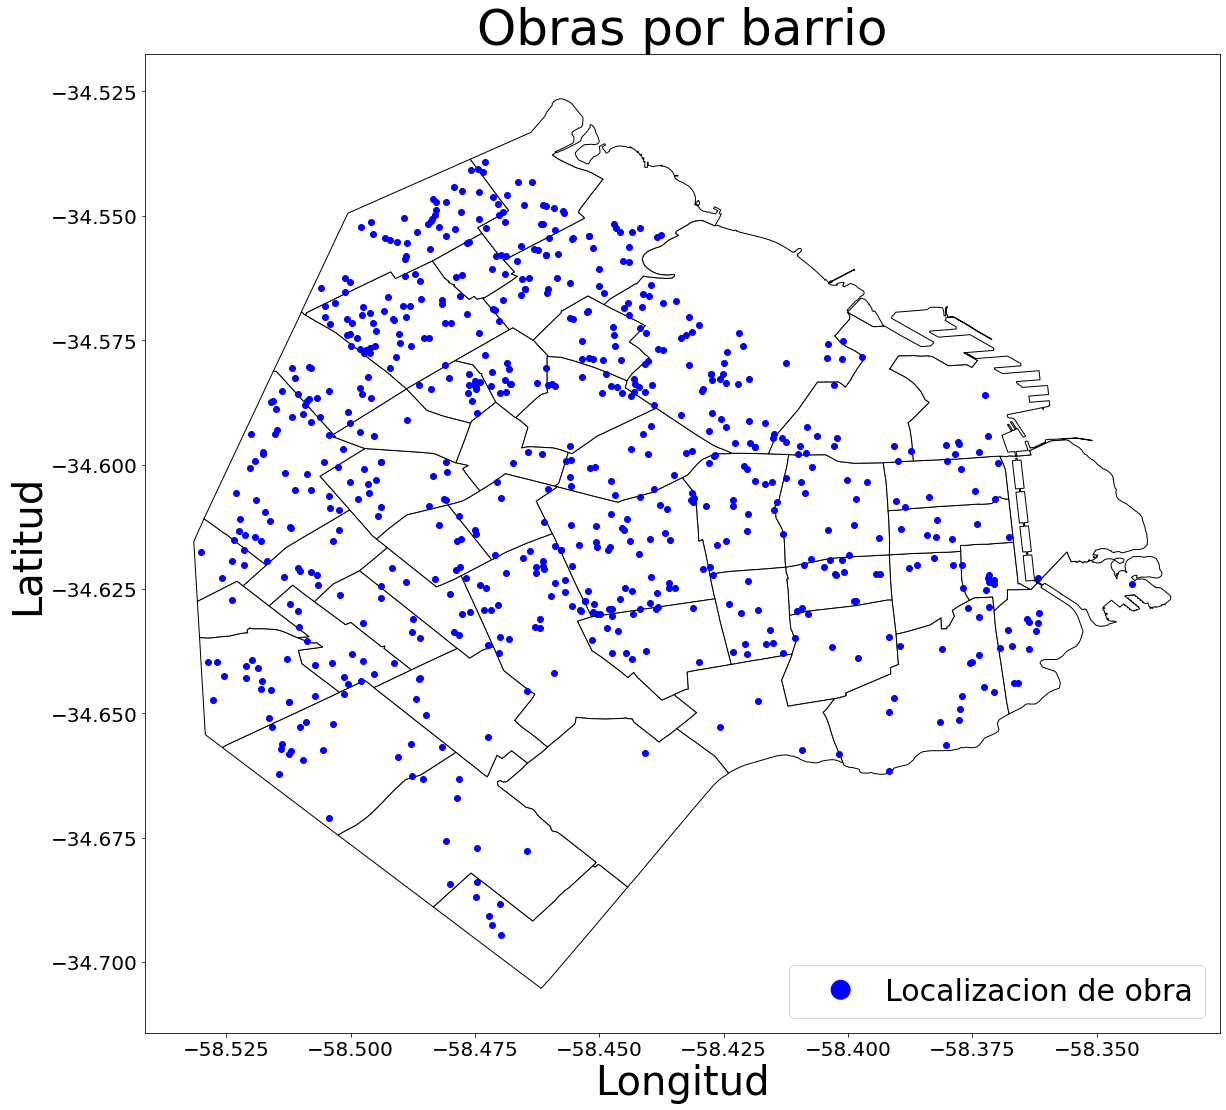

In [118]:
fig, ax = plt.subplots(1, figsize=(25, 18))

# axis labels
ax.set_xlabel('Longitud', fontsize = 40)
ax.set_ylabel('Latitud', fontsize = 40)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# add a title
ax.set_title('Obras por barrio', \
              fontdict={'fontsize': '50',
                        'fontweight' : '12'})

# create map
mapa_calor_base = merged.plot( linewidth=1, ax=ax, edgecolor='0',color='white')
obras_position = obras_location.plot(ax=mapa_calor_base,color='blue')

# i dont know how to put a circle on legend
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
#         center = 0.5 * width -, 0.5 * height - 0.5 * ydescent
        center = 40,10
        p = mpatches.Ellipse(xy=center, width=20 , height=20 )
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

c = mpatches.Circle((10, 10), facecolor="blue")
plt.legend([c], ["Localizacion de obra"], handler_map={mpatches.Circle: HandlerEllipse()},loc='lower right', fontsize=30)

plt.show()
